In [1]:
# import libraries

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from network import *

%matplotlib inline
np.random.seed(1)

In [2]:
# loading training and test sets
train_orig = pd.read_csv('../input/original_mnist/train.csv')
test = pd.read_csv('../input/original_mnist/test.csv')

In [3]:
# displaying the training set
train_orig

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# displaying the test set
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# randomly shuffle training data and create the dev set

train_shuffled = train_orig.iloc[np.random.permutation(train_orig.shape[0])]
train = train_shuffled.iloc[:50000, :]
dev = train_shuffled.iloc[50000:, :]

In [6]:
n = train.shape[1] - 1  # number of features
m_train = train.shape[0]  # number of training examples
m_dev = dev.shape[0]  # number of examples in dev set
m_test = test.shape[0]  # number of examples in test set
print(n, m_train, m_dev, m_test)

784 50000 10000 10000


In [7]:
# Separate features from labels

X_train = np.array(train.loc[:, 'pixel0':].T).reshape(n, m_train)
Y_train = np.array(train['label'].T).reshape(1, m_train)
X_dev = np.array(dev.loc[:, 'pixel0':].T).reshape(n, m_dev)
Y_dev = np.array(dev['label'].T).reshape(1, m_dev)
X_test = np.array(test.loc[:, 'pixel0':].T).reshape(n, m_test)
Y_test = np.array(test['label'].T).reshape(1, m_test)

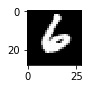

In [56]:
# visualize images (change index to visualize other images)

index = 15247
h, w = (28, 28)
plt.figure(figsize=(1, 1))
data = np.array(X_train[:, index].reshape(h, w), dtype=np.uint8)
img = Image.fromarray(data, mode='L')  # mode='L' for 8-bit pixels, black and white
plt.imshow(img, cmap='gray')

In [9]:
# convert Y_train to equivalent one_hot_encoding

Y_train_one_hot = one_hot_encoding(Y_train, 10)  # num_of_output_units = 10
print(Y_train_one_hot.shape)

(10, 50000)


In [96]:
# create a neural network

nn = network([X_train.shape[0], 15, 10], X_train, Y_train_one_hot)

In [97]:
# gradient descent

nn.nn_model(learning_rate=0.0001, num_iter=3000)

Iteration 0 : 85.3745750591
Iteration 1 : 15.8251923097
Iteration 2 : 13.0658428877
Iteration 3 : 10.4076627222
Iteration 4 : 7.85986771562
Iteration 5 : 5.73047645655
Iteration 6 : 4.25363080371
Iteration 7 : 3.43541437526
Iteration 8 : 3.31034720743
Iteration 9 : 3.21856319499
Iteration 10 : 3.36152018943
Iteration 11 : 3.19656467606
Iteration 12 : 3.3832991357
Iteration 13 : 3.23787346535
Iteration 14 : 3.32348698072
Iteration 15 : 3.19497173655
Iteration 16 : 3.39887646238
Iteration 17 : 3.20078728737
Iteration 18 : 3.23488072453
Iteration 19 : 3.20156880659
Iteration 20 : 3.46649653006
Iteration 21 : 3.17150898368
Iteration 22 : 3.16206979781
Iteration 23 : 3.12153362719
Iteration 24 : 3.22624054296
Iteration 25 : 3.33590787419
Iteration 26 : 3.15905342053
Iteration 27 : 3.15935464195
Iteration 28 : 3.23951311938
Iteration 29 : 3.39837891429
Iteration 30 : 3.12588229232
Iteration 31 : 3.07116318992
Iteration 32 : 3.15202706464
Iteration 33 : 3.13367339205
Iteration 34 : 3.11820583

Iteration 278 : 1.84327312946
Iteration 279 : 1.82752299676
Iteration 280 : 1.83492434995
Iteration 281 : 1.81956285862
Iteration 282 : 1.82673135909
Iteration 283 : 1.81174012207
Iteration 284 : 1.81868232142
Iteration 285 : 1.80404551638
Iteration 286 : 1.81076638727
Iteration 287 : 1.79647075844
Iteration 288 : 1.80297383399
Iteration 289 : 1.78900843889
Iteration 290 : 1.79529607062
Iteration 291 : 1.78165191289
Iteration 292 : 1.78772557449
Iteration 293 : 1.77439522366
Iteration 294 : 1.7802558013
Iteration 295 : 1.76723305502
Iteration 296 : 1.7728810864
Iteration 297 : 1.76016069506
Iteration 298 : 1.7655965428
Iteration 299 : 1.75317399546
Iteration 300 : 1.75839795818
Iteration 301 : 1.74626931927
Iteration 302 : 1.75128169426
Iteration 303 : 1.73944347845
Iteration 304 : 1.74424459276
Iteration 305 : 1.73269366712
Iteration 306 : 1.73728389155
Iteration 307 : 1.72601739668
Iteration 308 : 1.73039715307
Iteration 309 : 1.71941243742
Iteration 310 : 1.72358220504
Iteration 311

Iteration 553 : 1.23790488581
Iteration 554 : 1.23678359577
Iteration 555 : 1.23566649672
Iteration 556 : 1.23455357093
Iteration 557 : 1.23344480107
Iteration 558 : 1.23234016132
Iteration 559 : 1.23123962968
Iteration 560 : 1.23014318589
Iteration 561 : 1.22905081178
Iteration 562 : 1.22796248943
Iteration 563 : 1.22687819273
Iteration 564 : 1.22579790315
Iteration 565 : 1.22472159667
Iteration 566 : 1.22364925719
Iteration 567 : 1.22258086976
Iteration 568 : 1.2215164156
Iteration 569 : 1.2204558702
Iteration 570 : 1.21939921955
Iteration 571 : 1.21834644439
Iteration 572 : 1.21729752756
Iteration 573 : 1.21625244498
Iteration 574 : 1.21521117976
Iteration 575 : 1.21417371583
Iteration 576 : 1.21314003152
Iteration 577 : 1.212110108
Iteration 578 : 1.21108392647
Iteration 579 : 1.21006146907
Iteration 580 : 1.20904271362
Iteration 581 : 1.20802764435
Iteration 582 : 1.20701624903
Iteration 583 : 1.20600851031
Iteration 584 : 1.20500440355
Iteration 585 : 1.20400391675
Iteration 586 

Iteration 827 : 1.03755102171
Iteration 828 : 1.03708221123
Iteration 829 : 1.03661463056
Iteration 830 : 1.03614827101
Iteration 831 : 1.03568312831
Iteration 832 : 1.03521919628
Iteration 833 : 1.03475646908
Iteration 834 : 1.03429494354
Iteration 835 : 1.03383461471
Iteration 836 : 1.03337547198
Iteration 837 : 1.03291751447
Iteration 838 : 1.03246074103
Iteration 839 : 1.03200514216
Iteration 840 : 1.03155067282
Iteration 841 : 1.03109735559
Iteration 842 : 1.03064519983
Iteration 843 : 1.03019420057
Iteration 844 : 1.02974435068
Iteration 845 : 1.02929565011
Iteration 846 : 1.02884809115
Iteration 847 : 1.0284016692
Iteration 848 : 1.02795637955
Iteration 849 : 1.0275122189
Iteration 850 : 1.02706918279
Iteration 851 : 1.02662726443
Iteration 852 : 1.02618645925
Iteration 853 : 1.02574676278
Iteration 854 : 1.02530817157
Iteration 855 : 1.02487067888
Iteration 856 : 1.02443428063
Iteration 857 : 1.02399897251
Iteration 858 : 1.02356474607
Iteration 859 : 1.02313159968
Iteration 86

Iteration 1093 : 0.943829668151
Iteration 1094 : 0.943560646025
Iteration 1095 : 0.943292067609
Iteration 1096 : 0.943023929293
Iteration 1097 : 0.942756224878
Iteration 1098 : 0.942488949364
Iteration 1099 : 0.942222109648
Iteration 1100 : 0.941955702877
Iteration 1101 : 0.94168972845
Iteration 1102 : 0.941424189504
Iteration 1103 : 0.941159073406
Iteration 1104 : 0.940894367599
Iteration 1105 : 0.940630089625
Iteration 1106 : 0.940366241341
Iteration 1107 : 0.940102819084
Iteration 1108 : 0.939839819447
Iteration 1109 : 0.939577241005
Iteration 1110 : 0.939315082497
Iteration 1111 : 0.939053340332
Iteration 1112 : 0.93879200851
Iteration 1113 : 0.938531092987
Iteration 1114 : 0.938270594033
Iteration 1115 : 0.938010511179
Iteration 1116 : 0.937750845163
Iteration 1117 : 0.937491590313
Iteration 1118 : 0.937232737921
Iteration 1119 : 0.936974299468
Iteration 1120 : 0.936716270407
Iteration 1121 : 0.936458650488
Iteration 1122 : 0.936201436702
Iteration 1123 : 0.935944628701
Iteration 

Iteration 1350 : 0.886177690299
Iteration 1351 : 0.885989554309
Iteration 1352 : 0.885801647356
Iteration 1353 : 0.885613970037
Iteration 1354 : 0.885426522414
Iteration 1355 : 0.885239302915
Iteration 1356 : 0.885052310822
Iteration 1357 : 0.884865544942
Iteration 1358 : 0.884679001543
Iteration 1359 : 0.884492681536
Iteration 1360 : 0.88430656275
Iteration 1361 : 0.884120670088
Iteration 1362 : 0.883935002057
Iteration 1363 : 0.883749558678
Iteration 1364 : 0.883564339182
Iteration 1365 : 0.88337934048
Iteration 1366 : 0.88319456681
Iteration 1367 : 0.883010016162
Iteration 1368 : 0.88282568538
Iteration 1369 : 0.882641572689
Iteration 1370 : 0.882457657689
Iteration 1371 : 0.88227396524
Iteration 1372 : 0.882090498822
Iteration 1373 : 0.881907253226
Iteration 1374 : 0.881724227533
Iteration 1375 : 0.881541418609
Iteration 1376 : 0.881358828699
Iteration 1377 : 0.881176454497
Iteration 1378 : 0.88099429556
Iteration 1379 : 0.880812354913
Iteration 1380 : 0.880630630578
Iteration 1381

Iteration 1607 : 0.844243126747
Iteration 1608 : 0.844101603708
Iteration 1609 : 0.843960231848
Iteration 1610 : 0.843819013872
Iteration 1611 : 0.843677943724
Iteration 1612 : 0.843537022913
Iteration 1613 : 0.843396245957
Iteration 1614 : 0.84325561777
Iteration 1615 : 0.843115138007
Iteration 1616 : 0.842974804959
Iteration 1617 : 0.842834630323
Iteration 1618 : 0.842694601141
Iteration 1619 : 0.842554713071
Iteration 1620 : 0.842414966505
Iteration 1621 : 0.842275360478
Iteration 1622 : 0.842135895386
Iteration 1623 : 0.841996577977
Iteration 1624 : 0.841857406803
Iteration 1625 : 0.841718387648
Iteration 1626 : 0.841579510715
Iteration 1627 : 0.841440775042
Iteration 1628 : 0.841302182676
Iteration 1629 : 0.841163735396
Iteration 1630 : 0.841025435023
Iteration 1631 : 0.840887276647
Iteration 1632 : 0.840749254931
Iteration 1633 : 0.840611395575
Iteration 1634 : 0.840473681406
Iteration 1635 : 0.840336114919
Iteration 1636 : 0.840198691789
Iteration 1637 : 0.840061404189
Iteration

Iteration 1865 : 0.812103676722
Iteration 1866 : 0.811994277384
Iteration 1867 : 0.811884985237
Iteration 1868 : 0.811775799281
Iteration 1869 : 0.811666719498
Iteration 1870 : 0.81155774242
Iteration 1871 : 0.811448868374
Iteration 1872 : 0.811340099177
Iteration 1873 : 0.811231413435
Iteration 1874 : 0.811122827229
Iteration 1875 : 0.811014344973
Iteration 1876 : 0.810905965991
Iteration 1877 : 0.810797683382
Iteration 1878 : 0.810689507575
Iteration 1879 : 0.81058144033
Iteration 1880 : 0.810473476348
Iteration 1881 : 0.810365616509
Iteration 1882 : 0.810257859628
Iteration 1883 : 0.810150204896
Iteration 1884 : 0.810042653905
Iteration 1885 : 0.80993520811
Iteration 1886 : 0.809827864147
Iteration 1887 : 0.809720622986
Iteration 1888 : 0.809613484809
Iteration 1889 : 0.809506448866
Iteration 1890 : 0.809399514966
Iteration 1891 : 0.80929268351
Iteration 1892 : 0.809185955147
Iteration 1893 : 0.809079329019
Iteration 1894 : 0.808972805369
Iteration 1895 : 0.808866383056
Iteration 18

Iteration 2122 : 0.787107048229
Iteration 2123 : 0.787020817168
Iteration 2124 : 0.786934669095
Iteration 2125 : 0.786848599997
Iteration 2126 : 0.786762618389
Iteration 2127 : 0.786676716039
Iteration 2128 : 0.786590891739
Iteration 2129 : 0.786505133082
Iteration 2130 : 0.786419451125
Iteration 2131 : 0.786333847448
Iteration 2132 : 0.786248321391
Iteration 2133 : 0.786162872446
Iteration 2134 : 0.786077503762
Iteration 2135 : 0.78599221343
Iteration 2136 : 0.785906996202
Iteration 2137 : 0.785821841664
Iteration 2138 : 0.785736761146
Iteration 2139 : 0.785651759919
Iteration 2140 : 0.785566831444
Iteration 2141 : 0.785481967391
Iteration 2142 : 0.78539718845
Iteration 2143 : 0.785312492761
Iteration 2144 : 0.785227873702
Iteration 2145 : 0.785143330066
Iteration 2146 : 0.785058860956
Iteration 2147 : 0.784974460799
Iteration 2148 : 0.784890133674
Iteration 2149 : 0.784805884382
Iteration 2150 : 0.784721712162
Iteration 2151 : 0.784637615625
Iteration 2152 : 0.784553595238
Iteration 

Iteration 2379 : 0.767293797272
Iteration 2380 : 0.767225122939
Iteration 2381 : 0.7671565073
Iteration 2382 : 0.767087945672
Iteration 2383 : 0.767019441488
Iteration 2384 : 0.766950997553
Iteration 2385 : 0.766882606535
Iteration 2386 : 0.766814275637
Iteration 2387 : 0.766746005461
Iteration 2388 : 0.76667779541
Iteration 2389 : 0.76660964538
Iteration 2390 : 0.766541555565
Iteration 2391 : 0.766473526892
Iteration 2392 : 0.766405561206
Iteration 2393 : 0.76633766063
Iteration 2394 : 0.766269824555
Iteration 2395 : 0.76620204871
Iteration 2396 : 0.766134333048
Iteration 2397 : 0.766066677084
Iteration 2398 : 0.765999079064
Iteration 2399 : 0.76593152765
Iteration 2400 : 0.765864027224
Iteration 2401 : 0.76579658407
Iteration 2402 : 0.76572920021
Iteration 2403 : 0.765661875538
Iteration 2404 : 0.76559461066
Iteration 2405 : 0.765527405143
Iteration 2406 : 0.765460260522
Iteration 2407 : 0.765393175104
Iteration 2408 : 0.76532614219
Iteration 2409 : 0.765259168395
Iteration 2410 : 0.

Iteration 2637 : 0.751385832437
Iteration 2638 : 0.751330627466
Iteration 2639 : 0.751275466684
Iteration 2640 : 0.751220345539
Iteration 2641 : 0.751165269963
Iteration 2642 : 0.751110240366
Iteration 2643 : 0.751055255834
Iteration 2644 : 0.751000318217
Iteration 2645 : 0.75094543472
Iteration 2646 : 0.750890595398
Iteration 2647 : 0.750835798238
Iteration 2648 : 0.750781044538
Iteration 2649 : 0.750726336456
Iteration 2650 : 0.750671673806
Iteration 2651 : 0.75061705436
Iteration 2652 : 0.75056248143
Iteration 2653 : 0.750507949969
Iteration 2654 : 0.750453457286
Iteration 2655 : 0.750399009994
Iteration 2656 : 0.750344605365
Iteration 2657 : 0.750290246358
Iteration 2658 : 0.750235935755
Iteration 2659 : 0.750181681534
Iteration 2660 : 0.750127477221
Iteration 2661 : 0.750073319629
Iteration 2662 : 0.750019205457
Iteration 2663 : 0.749965129466
Iteration 2664 : 0.749911099242
Iteration 2665 : 0.749857115959
Iteration 2666 : 0.749803181399
Iteration 2667 : 0.74974929765
Iteration 26

Iteration 2894 : 0.738580757907
Iteration 2895 : 0.73853577659
Iteration 2896 : 0.738490827896
Iteration 2897 : 0.738445915194
Iteration 2898 : 0.738401031561
Iteration 2899 : 0.738356157725
Iteration 2900 : 0.738311319687
Iteration 2901 : 0.738266517069
Iteration 2902 : 0.738221751185
Iteration 2903 : 0.738177026591
Iteration 2904 : 0.738132342231
Iteration 2905 : 0.738087693628
Iteration 2906 : 0.738043080506
Iteration 2907 : 0.737998502324
Iteration 2908 : 0.737953959273
Iteration 2909 : 0.737909452581
Iteration 2910 : 0.737864985286
Iteration 2911 : 0.737820553638
Iteration 2912 : 0.737776162434
Iteration 2913 : 0.737731808332
Iteration 2914 : 0.737687478471
Iteration 2915 : 0.73764315373
Iteration 2916 : 0.737598862228
Iteration 2917 : 0.737554605939
Iteration 2918 : 0.737510382957
Iteration 2919 : 0.737466188332
Iteration 2920 : 0.737422029679
Iteration 2921 : 0.737377905604
Iteration 2922 : 0.737333810864
Iteration 2923 : 0.737289730684
Iteration 2924 : 0.737245683844
Iteration 

In [98]:
# prediction of labels

Y_hat_train_one_hot = nn.predict(X_train)
Y_hat_train = np.argmax(Y_hat_train_one_hot, axis=0).reshape(1, m_train)
Y_hat_dev_one_hot = nn.predict(X_dev)
Y_hat_dev = np.argmax(Y_hat_dev_one_hot, axis=0).reshape(1, m_dev)

In [99]:
# print accuracy on the dev set

print('Training set accuracy :', score(Y_hat_train, Y_train) * 100, '%')
print('Dev set accuracy :', score(Y_hat_dev, Y_dev) * 100, '%')

Training set accuracy : 90.174 %
Dev set accuracy : 90.29 %
